In [2]:
'''
1. RUN THE CELLS SEQUENTIALLY TO AVOID ANY IMPEDIMENTS
2. READ THE INSTRUCTIONS IN EACH CELL CAREFULLY
3. IN THE ABSENCE OF ANY INSTRUCTIONS, YOU MAY PROCEED TO RUN IT

This plot comprises the scatter plot for the β and α values corresponding to paradigm-I (10 classes)
'''

'\n1. RUN THE CELLS SEQUENTIALLY TO AVOID ANY IMPEDIMENTS\n2. READ THE INSTRUCTIONS IN EACH CELL CAREFULLY\n3. IN THE ABSENCE OF ANY INSTRUCTIONS, YOU MAY PROCEED TO RUN IT\n\nThis plot comprises the scatter plot for the β and α values corresponding to paradigm-I (10 classes)\n'

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil
import pickle
import random

plt.style.use(['science', 'no-latex'])
files = os.listdir()

In [4]:
def load_res(save_loc, dest_folder='./2'):
    if dest_folder is not None:
        os.makedirs(dest_folder, exist_ok=True)
        shutil.copy(save_loc, dest_folder)

    with open(save_loc, 'rb') as f:
        res = pickle.load(f)

    return res

def avg_across_dicts(dicts):
    """

    Args:
        dicts: list of dictionaries with same keys and lists as elements

    Returns:
        single dict with the keys and average of lists

    """
    avg_dict = dict()
    keys = dicts[0].keys()
    for k in keys:
        values = []
        for d in dicts:
            values.append(d[k])
        avg_dict[k] = np.mean(values, axis=0)

    return avg_dict

def str_contains(word_list, string):
    for word in word_list:
        if word not in string:
            return False
    
    return True

In [14]:
# SELECT ALGORITHM TYPE
# 'naive' CORRESPONDS TO THE 'vanilla' CL ALGORITHM
_alg_type = 'lwf' # naive / ewc / lwf

fmnist_10_indicators = ['mnist.FashionMNIST', 'classes.10', '-avg']
mnist_10_indicators = ['mnist.MNIST', 'classes.10', '-avg']
cifar_10_indicators = ['cifar.CIFAR10', 'classes.10', '-avg']

fmnist_10_indicators_t1 = ['mnist.FashionMNIST', 'classes.10', '-t1']
mnist_10_indicators_t1 = ['mnist.MNIST', 'classes.10', '-t1']
cifar_10_indicators_t1 = ['cifar.CIFAR10', 'classes.10', '-t1']

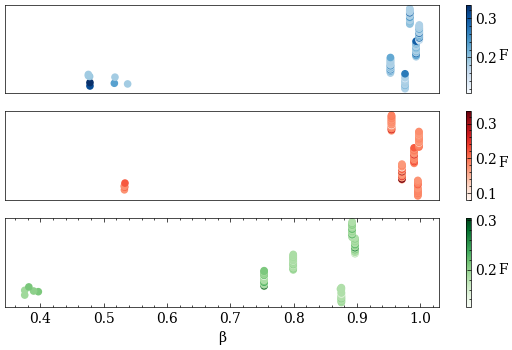

In [15]:
fig, axes = plt.subplots(3, 1, dpi=100, figsize=(7, 4))
axes[0].get_shared_x_axes().join(axes[0], *axes)
# =================================================

result_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(fmnist_10_indicators + [_alg_type], f)]
result_dict = avg_across_dicts(result_dict)
t1_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(fmnist_10_indicators_t1 + [_alg_type], f)]
t1_dict = avg_across_dicts(t1_dict)
f_var = [(2 * v[-1]) / ((v_t1[0] - v_t1[-1]) * v[-1] + 1) for v, v_t1 in zip(result_dict.values(), t1_dict.values())]

delta = [v[0] - v[-1] for k,v in t1_dict.items()]
curr_idx = [i for i in range(120)]

plt_1 = axes[0].scatter(delta, curr_idx, c=f_var, s=20, cmap='Blues')
axes[0].set_yticks([]), axes[0].set_xticks([])
# axes[0].set_ylabel('FashionMNIST')
cbar = plt.colorbar(plt_1, ax=axes[0], label='F')
cbar.set_label('F', rotation=0)
# =================================================

result_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(mnist_10_indicators + [_alg_type], f)]
result_dict = avg_across_dicts(result_dict)
t1_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(mnist_10_indicators_t1 + [_alg_type], f)]
t1_dict = avg_across_dicts(t1_dict)
f_var = [(2 * v[-1]) / ((v_t1[0] - v_t1[-1]) * v[-1] + 1) for v, v_t1 in zip(result_dict.values(), t1_dict.values())]

delta = [v[0] - v[-1] for k,v in t1_dict.items()]
curr_idx = [i for i in range(120)]

plt_2 = axes[1].scatter(delta, curr_idx, c=f_var, s=20, cmap='Reds')
axes[1].set_yticks([]), axes[1].set_xticks([])
# axes[1].set_ylabel('MNIST')
clb = plt.colorbar(plt_2, ax=axes[1], label='F')
clb.set_label('F', rotation=0)
# =================================================

result_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(cifar_10_indicators + [_alg_type], f)]
result_dict = avg_across_dicts(result_dict)
t1_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(cifar_10_indicators_t1 + [_alg_type], f)]
t1_dict = avg_across_dicts(t1_dict)
f_var = [(2 * v[-1]) / ((v_t1[0] - v_t1[-1]) * v[-1] + 1) for v, v_t1 in zip(result_dict.values(), t1_dict.values())]

delta = [v[0] - v[-1] for k,v in t1_dict.items()]
curr_idx = [i for i in range(120)]

plt_3 = axes[2].scatter(delta, curr_idx, c=f_var, s=20, cmap='Greens')
axes[2].set_yticks([])
# axes[2].set_ylabel('CIFAR10')
axes[2].set_xlabel('β')
clb = plt.colorbar(plt_3, ax=axes[2], label='F')
clb.set_label('F', rotation=0)
# =================================================

fig.savefig('paper.fig.fscores.scatter.β_{}_10.png'.format(_alg_type), dpi=200)

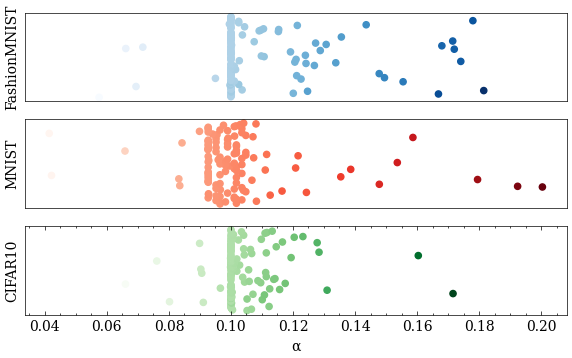

In [16]:
fig, axes = plt.subplots(3, 1, dpi=100, figsize=(7, 4))
axes[0].get_shared_x_axes().join(axes[0], *axes)
# =================================================

result_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(fmnist_10_indicators + [_alg_type], f)]
result_dict = avg_across_dicts(result_dict)
t1_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(fmnist_10_indicators_t1 + [_alg_type], f)]
t1_dict = avg_across_dicts(t1_dict)
f_var = [(2 * v[-1]) / ((v_t1[0] - v_t1[-1]) * v[-1] + 1) for v, v_t1 in zip(result_dict.values(), t1_dict.values())]

delta = [v[-1] for k,v in result_dict.items()]
curr_idx = [i for i in range(120)]

plt_1 = axes[0].scatter(delta, curr_idx, c=f_var, s=20, cmap='Blues')
axes[0].set_yticks([]), axes[0].set_xticks([])
axes[0].set_ylabel('FashionMNIST')
# cbar = plt.colorbar(plt_1, ax=axes[0], label='F')
print(cbar)
# =================================================

result_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(mnist_10_indicators + [_alg_type], f)]
result_dict = avg_across_dicts(result_dict)
t1_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(mnist_10_indicators_t1 + [_alg_type], f)]
t1_dict = avg_across_dicts(t1_dict)
f_var = [(2 * v[-1]) / ((v_t1[0] - v_t1[-1]) * v[-1] + 1) for v, v_t1 in zip(result_dict.values(), t1_dict.values())]

delta = [v[-1] for k,v in result_dict.items()]
curr_idx = [i for i in range(120)]

plt_2 = axes[1].scatter(delta, curr_idx, c=f_var, s=20, cmap='Reds')
axes[1].set_yticks([]), axes[1].set_xticks([])
axes[1].set_ylabel('MNIST')
# plt.colorbar(plt_2, ax=axes[1], label='F')
# =================================================

result_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(cifar_10_indicators + [_alg_type], f)]
result_dict = avg_across_dicts(result_dict)
t1_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(cifar_10_indicators_t1 + [_alg_type], f)]
t1_dict = avg_across_dicts(t1_dict)
f_var = [(2 * v[-1]) / ((v_t1[0] - v_t1[-1]) * v[-1] + 1) for v, v_t1 in zip(result_dict.values(), t1_dict.values())]

delta = [v[-1] for k,v in result_dict.items()]
curr_idx = [i for i in range(120)]

plt_3 = axes[2].scatter(delta, curr_idx, c=f_var, s=20, cmap='Greens')
axes[2].set_yticks([])
axes[2].set_ylabel('CIFAR10')
axes[2].set_xlabel('α')
# plt.colorbar(plt_3, ax=axes[2], label='F')
# =================================================

fig.savefig('paper.fig.fscores.scatter.α_{}_10.png'.format(_alg_type), dpi=200)

In [78]:
import random
import numpy as np
from scipy.stats import f_oneway, ttest_ind


result_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(mnist_10_indicators + [_alg_type], f)]
result_dict = avg_across_dicts(result_dict)
t1_dict = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(mnist_10_indicators_t1 + [_alg_type], f)]
t1_dict = avg_across_dicts(t1_dict)
f_var = [(2 * v[-1]) / ((v_t1[0] - v_t1[-1]) * v[-1] + 1) for v, v_t1 in zip(result_dict.values(), t1_dict.values())]

# Probabilities of accuracy for each task
probabilities = [1/2, 1/4, 1/6, 1/8, 1/10]

# Number of trials and lists
num_trials = 1000
num_lists = 120

# Storage for accuracies across lists
accuracies_lists = []

# Generate the lists
for _ in range(num_lists):
    accuracies = []
    for _ in range(num_trials):
        accuracy = [1 if random.random() < prob else 0 for prob in probabilities]
        accuracies.append(accuracy)
    accuracies_lists.append(accuracies)
avg_accuracies = np.mean(accuracies_lists, axis=0)
f_var_chance = [(2 * v[-1]) / ((v_t1[0] - v_t1[-1]) * v[-1] + 1) for v, v_t1 in zip(avg_accuracies, avg_accuracies)]

print(ttest_ind(a=f_var, b=f_var_chance, equal_var=True))

# # Calculate average accuracy for each task across lists
avg_accuracies = np.mean(np.mean(accuracies_lists, axis=0), axis=0)
for _res in (result_dict.values()):
    print(ttest_ind(a=_res, b=avg_accuracies))

Ttest_indResult(statistic=-2.2924966053101308, pvalue=0.02206207269050962)
Ttest_indResult(statistic=1.0870324652021561, pvalue=0.30868594960546075)
Ttest_indResult(statistic=1.095266291592386, pvalue=0.3052751095626212)
Ttest_indResult(statistic=1.122852032815534, pvalue=0.2940655466382154)
Ttest_indResult(statistic=1.127779216918532, pvalue=0.29209847138761774)
Ttest_indResult(statistic=1.2086209595083222, pvalue=0.26131684709902214)
Ttest_indResult(statistic=1.1869105948989485, pvalue=0.2693099611126853)
Ttest_indResult(statistic=1.5246249009255404, pvalue=0.16586029710368824)
Ttest_indResult(statistic=1.523213640987007, pvalue=0.16620696630010043)
Ttest_indResult(statistic=1.2496588605098993, pvalue=0.24674411182375453)
Ttest_indResult(statistic=1.2351318072978703, pvalue=0.25182330041595236)
Ttest_indResult(statistic=1.259349414704202, pvalue=0.2434038363002453)
Ttest_indResult(statistic=1.2535603593744276, pvalue=0.2453946971650524)
Ttest_indResult(statistic=1.5556024334714362, p